<a href="https://colab.research.google.com/github/vpatil2209/Netflix-/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [3]:
# Store the dataset in a dataframe
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [4]:
# Get the no of trading days
df.shape

(1007, 7)

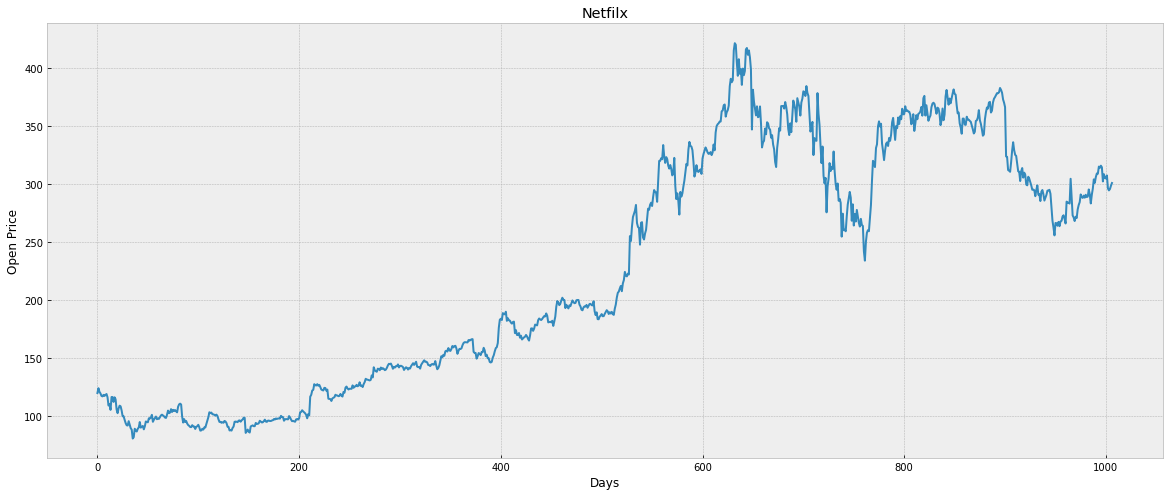

In [5]:
# Visualize the open price
plt.figure(figsize=(20, 8))
plt.title('Netfilx')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot(df['Open'])
plt.show()

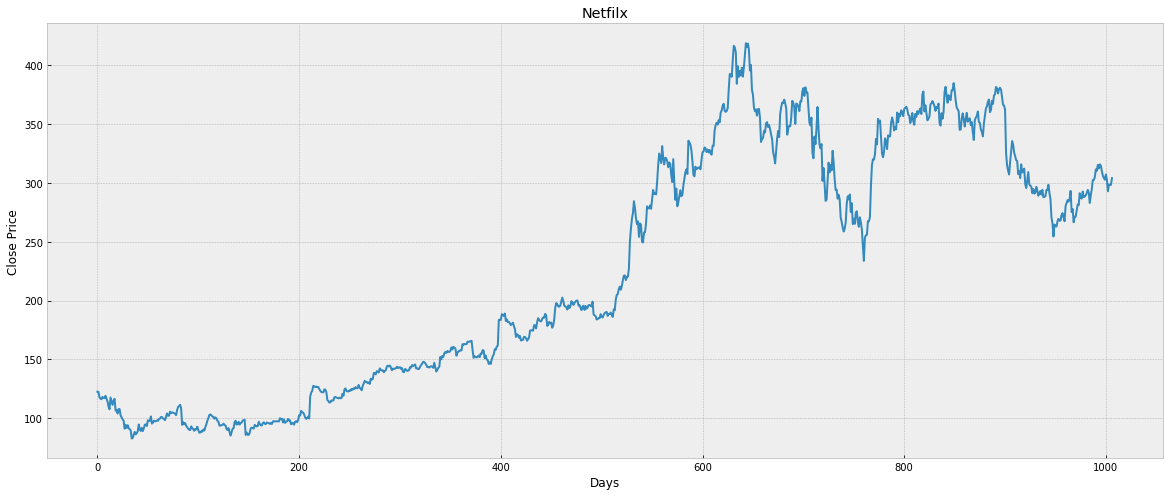

In [6]:
# Visualize the close price
plt.figure(figsize=(20, 8))
plt.title('Netfilx')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999489  0.999333  0.998712   0.998712 -0.095059
High       0.999489  1.000000  0.999264  0.999438   0.999438 -0.084998
Low        0.999333  0.999264  1.000000  0.999448   0.999448 -0.107404
Close      0.998712  0.999438  0.999448  1.000000   1.000000 -0.095180
Adj Close  0.998712  0.999438  0.999448  1.000000   1.000000 -0.095180
Volume    -0.095059 -0.084998 -0.107404 -0.095180  -0.095180  1.000000


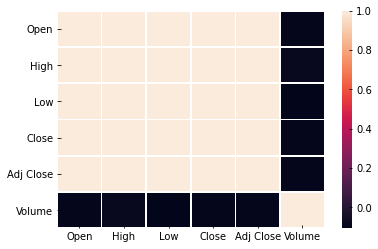

In [8]:
# Finding correlation
cor = df.corr()
print(cor)
sns.heatmap(cor, fmt = " ", linewidths = 0.70)

In [12]:
# Creating df for only close price
df = df[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [13]:
# Predicting the future value
days = 25
df['Prediction'] = df[['Close']].shift(-days)
df.head()

,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004
4,116.239998,91.839996


In [14]:
# Create a feature dataset and delete x rows
X = np.array(df.drop(['Prediction'], 1))[:-days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [15]:
# Target dataset convert to y and creatiing  numpy array
y = np.array(df['Prediction'])[:-days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
# Models
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear = LinearRegression().fit(x_train, y_train)

In [18]:
x_days = df.drop(['Prediction'], 1)[: -days]
x_days = x_days.tail(days)
x_days = np.array(x_days)
print(x_days)

[[274.459991]
 [270.720001]
 [267.529999]
 [280.480011]
 [282.929993]
 [285.529999]
 [284.25    ]
 [286.279999]
 [293.350006]
 [275.299988]
 [278.049988]
 [266.690002]
 [271.269989]
 [271.5     ]
 [276.820007]
 [281.859985]
 [281.209991]
 [291.450012]
 [287.410004]
 [286.809998]
 [292.859985]
 [288.029999]
 [288.589996]
 [289.570007]
 [291.570007]]


In [19]:
# Decision tree prediction
print('Decision Regressor Prediction')
tree_predict = tree.predict(x_days)
print(tree_predict)

# Linear Regression
print('Linear Regression Prediction')
linear_predict = linear.predict(x_days)
print(linear_predict)

Decision Regressor Prediction
[294.179993 292.01001  283.109985 289.619995 332.940002 302.570007
 302.600006 305.160004 311.690002 310.480011 315.549988 312.48999
 315.929993 315.929993 309.98999  306.160004 304.320007 302.859985
 307.350006 302.5      280.480011 284.25     298.440002 298.5
 304.209991]
Linear Regression Prediction
[276.05767658 272.53068567 269.52235995 281.73484574 284.04529691
 286.49722794 285.29012716 287.20451411 293.87187163 276.84983426
 279.44321687 268.73020228 273.04935087 273.26626234 278.28328548
 283.03622776 282.42325208 292.08008567 288.27016331 287.70432872
 293.4097582  288.85484849 289.38295267 290.3071503  292.19324674]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


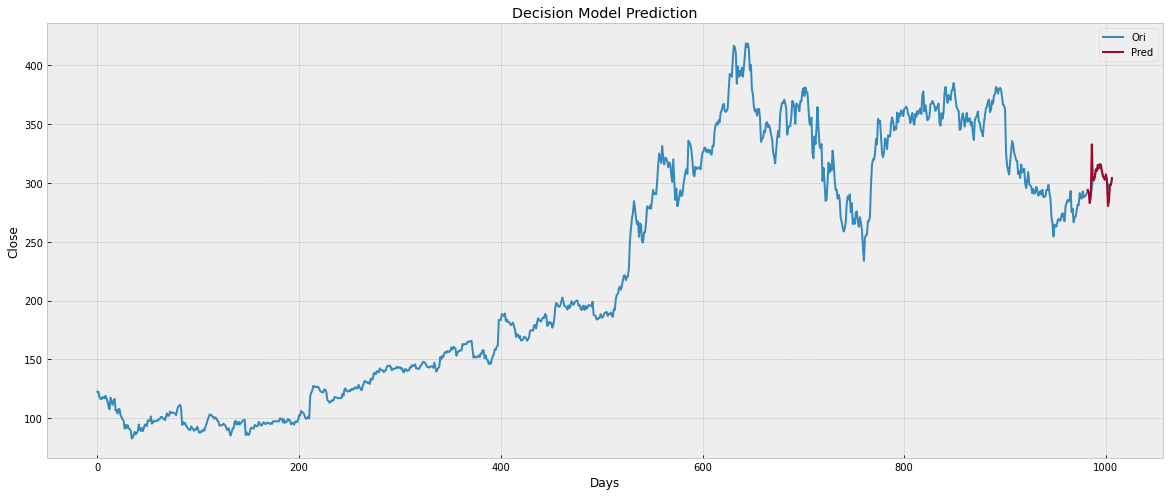

In [20]:
# Visualizing the data models
prediction = tree_predict
df1 = df[X.shape[0]:]
df1['Pred'] = prediction
plt.figure(figsize=(20, 8))
plt.title('Decision Model Prediction')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(df1['Pred'])
plt.legend(['Ori', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


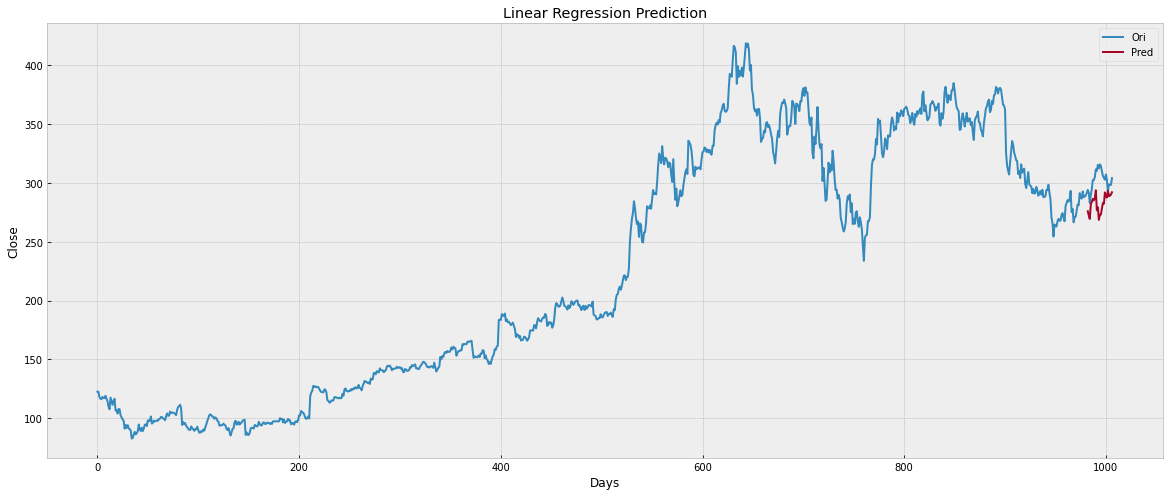

In [21]:
# Visualizing the data models
prediction = linear_predict
df1 = df[X.shape[0]:]
df1['Pred'] = prediction
plt.figure(figsize=(20, 8))
plt.title('Linear Regression Prediction')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(df1['Pred'])
plt.legend(['Ori', 'Pred'])
plt.show()